In [1]:
from model import *
from data import *

In [2]:
# for Gunpowder
ZARR_FOLDER = '../../../../data/cells/raw/zarr/'
gp_batch_size= 12
gp_voxel_shape = [1,1,1]
gp_input_shape= [256, 256,4]
gp_output_shape = [ 256, 256,4]

# For unet
OUTPUT_PATH = '../../../../data/cells/models/'
model_name = 'unet_cells.hdf5'
unet_input_size = (256,256,4)
unet_output_size = 4

### Check data 

In [3]:
gen_train_fast = generate_fast_training_batch(ZARR_FOLDER, batch_size=gp_batch_size
                                              ,voxel_shape = gp_voxel_shape,
                                              input_shape= gp_input_shape,output_shape = gp_output_shape )

In [4]:
im,mask = next(gen_train_fast)

In [5]:
test_im = im[0]
test_mask = mask[0]
print('Img size: {} {} < {} | Mask size: {} {} <{}'.format(test_im.shape,test_im.dtype,test_im.max()
                                                                   ,test_mask.shape,test_mask.dtype,test_mask.max()))

Img size: (256, 256, 4) float32 < 1.0 | Mask size: (256, 256, 4) float32 <1.0


### Model

In [6]:
model = unet(input_size = unet_input_size ,output_size = unet_output_size)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 4) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

### Train

In [8]:
model_file = os.path.join(OUTPUT_PATH,model_name)
model_checkpoint = ModelCheckpoint(model_file, monitor='loss',verbose=1, save_best_only=True)

In [9]:
history = model.fit_generator(gen_train_fast,steps_per_epoch=50,epochs=20,callbacks=[model_checkpoint])


Epoch 1/20
49/50 [============================>.] - ETA: 0s - loss: 0.1742 - accuracy: 0.9389
Epoch 00001: loss improved from inf to 0.17211, saving model to ../../../../data/cells/models/unet_cells.hdf5
50/50 [==============================] - 44s 876ms/step - loss: 0.1721 - accuracy: 0.9395
Epoch 2/20
49/50 [============================>.] - ETA: 0s - loss: 0.0666 - accuracy: 0.9707
Epoch 00002: loss improved from 0.17211 to 0.06638, saving model to ../../../../data/cells/models/unet_cells.hdf5
50/50 [==============================] - 39s 787ms/step - loss: 0.0664 - accuracy: 0.9708
Epoch 3/20
49/50 [============================>.] - ETA: 0s - loss: 0.0569 - accuracy: 0.9760
Epoch 00003: loss improved from 0.06638 to 0.05664, saving model to ../../../../data/cells/models/unet_cells.hdf5
50/50 [==============================] - 40s 791ms/step - loss: 0.0566 - accuracy: 0.9761
Epoch 4/20
49/50 [============================>.] - ETA: 0s - loss: 0.0481 - accuracy: 0.9801
Epoch 00004: los

### Test

In [10]:
im,mask = next(gen_train_fast)

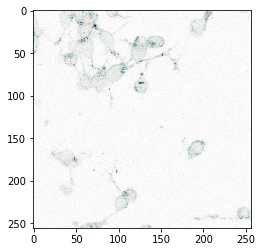

In [11]:
plt.imshow(im[0])
# print(im[0])

In [12]:
results = model.predict(im)

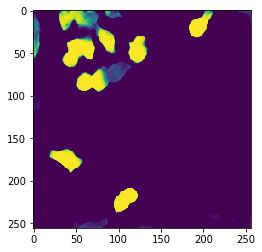

In [13]:
plt.imshow(results[0][:,:,3])